In [1]:
# This is an example of the Banks portfolio, a program has been made for each FTSE100 sector portfolio.
# Imports modules into the program to be used

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from pandas import DataFrame
import matplotlib.pyplot as plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar import vecm
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm

In [3]:
# Pulls the data from Yahoo Finance using the share ticker (e.g. 'BARC.L' = Barclays) for time periods 23/06/2016 to 01-11-2019

In [4]:
tickers = ['BARC.L', 'HSBA.L', 'LLOY.L', 'RBS.L', 'STAN.L']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2016-6-23', end='2019-11-01')['Adj Close']

In [5]:
#Reads out the data to check for missing values and abnormalities

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 852 entries, 2016-06-23 to 2019-11-01
Data columns (total 5 columns):
BARC.L    852 non-null float64
HSBA.L    852 non-null float64
LLOY.L    852 non-null float64
RBS.L     852 non-null float64
STAN.L    852 non-null float64
dtypes: float64(5)
memory usage: 39.9 KB


In [7]:
mydata.head()

,BARC.L,HSBA.L,LLOY.L,RBS.L,STAN.L
Date,,,,,
2016-06-23,165.209885,357.934967,56.745163,233.842804,529.221497
2016-06-24,136.003204,352.815399,44.829857,191.648422,515.583618
2016-06-27,112.408127,344.978516,40.228905,162.709778,483.273773
2016-06-28,116.208084,349.389282,43.217556,162.243027,493.342010
2016-06-29,121.908020,356.595978,43.665859,168.217438,510.091797


In [8]:
mydata.tail()

,BARC.L,HSBA.L,LLOY.L,RBS.L,STAN.L
Date,,,,,
2019-10-28,164.335114,571.909180,54.472363,215.424500,667.407776
2019-10-29,165.511002,565.751343,53.853039,211.185364,670.107483
2019-10-30,162.330322,565.751343,53.242966,205.886459,687.269897
2019-10-31,161.732742,560.940552,52.503479,204.923019,675.892578
2019-11-01,161.135147,566.521057,52.974903,206.849899,680.713501


In [9]:
# Visual representation of data to check for abnormalities and missing data

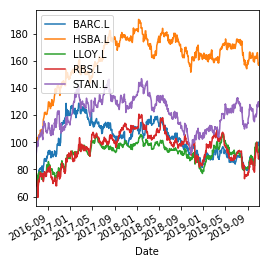

In [10]:
(mydata / mydata.iloc[0] * 100).plot(figsize =(4, 4))

In [11]:
# Converts data to natural logarithms

In [12]:
logmydata = np.log(mydata)

In [13]:
# Visual representation of log data to check for abnormalities

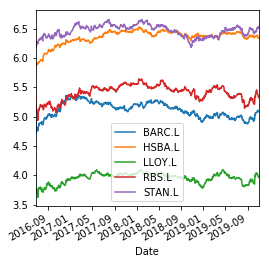

In [14]:
logmydata.plot(figsize =(4, 4))

In [15]:
# Calculate log returns and check the populated table

In [16]:
logreturns = (logmydata/logmydata.shift(1)) - 1

In [17]:
logreturns.head()

,BARC.L,HSBA.L,LLOY.L,RBS.L,STAN.L
Date,,,,,
2016-06-23,NaN,NaN,NaN,NaN,NaN
2016-06-24,-0.038091,-0.002450,-0.058361,-0.036480,-0.004163
2016-06-27,-0.038786,-0.003829,-0.028475,-0.031146,-0.010362
2016-06-28,0.007040,0.002174,0.019396,-0.000564,0.003336
2016-06-29,0.010070,0.003486,0.002740,0.007106,0.005384


In [18]:
logreturns.tail()

,BARC.L,HSBA.L,LLOY.L,RBS.L,STAN.L
Date,,,,,
2019-10-28,0.000161,-0.005944,-0.004481,-0.001819,0.000044
2019-10-29,0.001398,-0.001705,-0.002860,-0.003699,0.000621
2019-10-30,-0.003798,0.000000,-0.002858,-0.004747,0.003886
2019-10-31,-0.000725,-0.001347,-0.003519,-0.000880,-0.002555
2019-11-01,-0.000728,0.001564,0.002257,0.001758,0.001091


In [19]:
# 'fillna(0)' corrects an error where 0 values are represent as null
# This prevents errrors occuring when performing the ADF tests

In [20]:
returns = (mydata.fillna(0)/mydata.fillna(0).shift(1)) - 1

In [21]:
returns.head()

,BARC.L,HSBA.L,LLOY.L,RBS.L,STAN.L
Date,,,,,
2016-06-23,NaN,NaN,NaN,NaN,NaN
2016-06-24,-0.176785,-0.014303,-0.209979,-0.180439,-0.025770
2016-06-27,-0.173489,-0.022212,-0.102631,-0.150999,-0.062667
2016-06-28,0.033805,0.012786,0.074291,-0.002869,0.020833
2016-06-29,0.049049,0.020627,0.010373,0.036824,0.033952


In [22]:
# Creates and equally weighted array table for the portolio

In [23]:
weights = np.array([(1/5), (1/5), (1/5), (1/5), (1/5)])

In [24]:
# X is the equaly weighted return of log price portfolio
# Y is the equaly weighted return of log reutrn portfolio

In [25]:
X = np.dot(logmydata, weights)

In [26]:
# Augmented Dickey Fuller (ADF) test for log price
# This checks that the data is stationary before conducting further econometric analysis

In [27]:
result = adfuller(X, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.6f' % (key, value))

ADF Statistic: -2.125394
p-value: 0.531850
Critical Values:
	1%: -3.969448
	5%: -3.415662
	10%: -3.130094


In [28]:
Y = np.dot(logreturns.iloc[1:], weights)

In [29]:
# ADF test for log reuturns

In [30]:
result2 = adfuller(Y, regression='nc')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.6f' % (key, value))

ADF Statistic: -27.780821
p-value: 0.000000
Critical Values:
	1%: -2.568375
	5%: -1.941321
	10%: -1.616511


In [31]:
# Visual representation of log returns portfolio to check for abnormatilities

In [32]:
log_portfolio_returns = pd.DataFrame(np.dot(logreturns, weights))

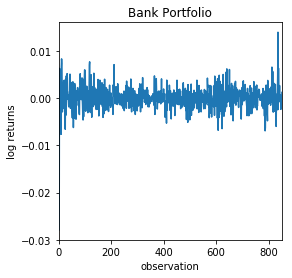

In [33]:
log_portfolio_returns.plot(figsize =(4, 4))
plot.title('Bank Portfolio')
plot.xlabel('observation')
plot.ylabel('log returns')
plot.gca().get_legend().remove()

In [34]:
# Creates a column for log retursn portfolio to be used in EViews

In [35]:
df = DataFrame(Y, columns= ['B'])

df.head()

,B
0,-0.027909
1,-0.022520
2,0.006277
3,0.005757
4,-0.001732


In [36]:
# Exports data as a CSV file to be used in EViews

In [37]:
#df.to_csv(r'C:\Users\XXXXXXX')